# Time Sereias Analysis model based

In [42]:
# impoerting basic libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [171]:
# reading the data
Air_series = pd.read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True)
Air_series.tail()

,Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


<AxesSubplot:xlabel='Month'>

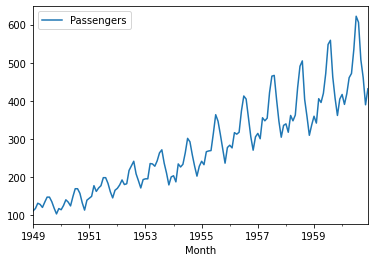

In [172]:
# visualising the data
Air_series.plot()

In [176]:
df = Air_series.copy()

In [177]:
# adding time period as interger time tp
df['TP']= range(1,len(Air_series)+1)

In [179]:
#  creating T square abd log values
df['TPSQ']= df['TP']*df['TP']
df['LogPs']= np.log(df['Passengers'])

In [180]:
# extracting month from date time data
df["month"] = df.index.strftime("%b")


In [181]:
monthly_sales.head()

,Sales,TP,TPSQ,Logsale,month
1986-03-31,1734.827000,1,1,7.458663,Mar
1986-04-30,1821.717956,2,4,7.507535,Apr
1986-05-31,1992.696933,3,9,7.597244,May
1986-06-30,2163.675911,4,16,7.679564,Jun
1986-07-31,2295.194737,5,25,7.738573,Jul


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  144 non-null    int64  
 1   TP          144 non-null    int32  
 2   TPSQ        144 non-null    int32  
 3   LogPs       144 non-null    float64
 4   month       144 non-null    object 
dtypes: float64(1), int32(2), int64(1), object(1)
memory usage: 5.6+ KB


In [183]:
# getting dummies for the month data
df_d = pd.get_dummies(df, dtype = int)

In [184]:
df_d.head()

,Passengers,TP,TPSQ,LogPs,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
Month,,,,,,,,,,,,,,,,
1949-01-01,112,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1949-02-01,118,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
1949-03-01,132,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
1949-04-01,129,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
1949-05-01,121,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0


# Splitting data

In [186]:
df_d.shape

(144, 16)

In [187]:
df_d.columns

Index(['Passengers', 'TP', 'TPSQ', 'LogPs', 'month_Apr', 'month_Aug',
       'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun',
       'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep'],
      dtype='object')

In [188]:
# splitting the data into test and train
split = len(df_d)-20
Train = df_d[0:split]
Test = df_d[split:]

In [189]:
print(df.shape,Train.shape, Test.shape)

(144, 5) (124, 16) (20, 16)


In [190]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 124 entries, 1949-01-01 to 1959-04-01
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  124 non-null    int64  
 1   TP          124 non-null    int32  
 2   TPSQ        124 non-null    int32  
 3   LogPs       124 non-null    float64
 4   month_Apr   124 non-null    int32  
 5   month_Aug   124 non-null    int32  
 6   month_Dec   124 non-null    int32  
 7   month_Feb   124 non-null    int32  
 8   month_Jan   124 non-null    int32  
 9   month_Jul   124 non-null    int32  
 10  month_Jun   124 non-null    int32  
 11  month_Mar   124 non-null    int32  
 12  month_May   124 non-null    int32  
 13  month_Nov   124 non-null    int32  
 14  month_Oct   124 non-null    int32  
 15  month_Sep   124 non-null    int32  
dtypes: float64(1), int32(14), int64(1)
memory usage: 9.7 KB


# Model Based Methods

## Linear Model

In [194]:
import statsmodels.formula.api as sm

# linear Model fitting
linear_model = sm.ols('Passengers~TP',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(Test['TP']))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

82.08970215725851

In [195]:
#Exponential model

Exp = sm.ols('LogPs~TP',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['TP'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


77.14147435700853

In [196]:
#Quadratic model

Quad = sm.ols('Passengers~TP+TPSQ',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[['TP','TPSQ']]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

75.23538008231668

In [210]:
#Additive seasonality 

add_sea = sm.ols('Passengers~ month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['month_Apr', 'month_Aug', 'month_Dec',
       'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar',
       'month_May', 'month_Nov', 'month_Oct', 'month_Sep']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

218.9562774385609

In [201]:
#Additive Seasonality with quadratic Quadratic 

add_sea_Quad = sm.ols('Passengers~ TP+TPSQ+month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

41.20732795050039

In [209]:
##Multiplicative Seasonality model

Mul_sea = sm.ols('LogPs~ month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data=Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test[['month_Apr', 'month_Aug', 'month_Dec',
       'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar',
       'month_May', 'month_Nov', 'month_Oct', 'month_Sep']]))
#pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

236.13152619224581

In [207]:
#Multiplicative Additive Seasonality model

Mul_add_sea = sm.ols('LogPs~ TP+month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data=Train).fit()
pred_Mult_add_sea = pd.Series(Mul_add_sea.predict(Test[['TP','month_Apr', 'month_Aug', 'month_Dec',
      'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar',
     'month_May', 'month_Nov', 'month_Oct', 'month_Sep']]))
#pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

38.36491279421249

In [211]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,38.364913
4,rmse_add_sea_quad,41.207328
2,rmse_Quad,75.235380
1,rmse_Exp,77.141474
0,rmse_linear,82.089702
3,rmse_add_sea,218.956277
5,rmse_Mult_sea,236.131526


In [ ]:
# from the above it seems Multiplicative Additive Seasonality model is good fit

In [212]:
# fitting for complete data
Model_full = sm.ols('LogPs~ TP+TPSQ+month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data=df_d).fit()


In [213]:
Model_full.summary()

# from r square value this seems good model
# we have used all dummy variable 
# but even after removing the one dummy variable the r square and r did not change 
# so keeping all variable in the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  LogPs   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     912.7
Date:                Wed, 19 May 2021   Prob (F-statistic):          7.45e-121
Time:                        01:16:58   Log-Likelihood:                 239.70
No. Observations:                 144   AIC:                            -451.4
Df Residuals:                     130   BIC:                            -409.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3721      0.011    387.168      0.000       4.350       4.394
TP             0.0132      0.000     33.877      0.000       0.012       0.014
TPSQ       -2.148e-05    2.6e-06     -8.265      0.000   -2.66e-05   -1.63e-05
month_Apr      0.3557      0.013     26.649      0.000       0.329       0.382
month_Aug      0.5700      0.013     42.659      0.000       0.544       0.596
month_Dec      0.2580      0.013     19.276      0.000       0.232       0.284
month_Feb      0.2571      0.013     19.265      0.000       0.231       0.283
month_Jan      0.2793      0.013     20.936      0.000       0.253       0.306
month_Jul      0.5793      0.013     43.365      0.000       0.553       0.606
month_Jun      0.4754      0.013     35.595      0.000       0.449       0.502
month_Mar      0.3871      0.013     29.007      0.000       0.361       0.414
month_May      0.3533      0.013     26.458      0.000       0.327       0.380
month_Nov      0.1439      0.013     10.758      0.000       0.117       0.170
month_Oct      0.2875      0.013     21.496      0.000       0.261       0.314
month_Sep      0.4255      0.013     31.830      0.000       0.399       0.452
==============================================================================
Omnibus:                        0.334   Durbin-Watson:                   0.648
Prob(Omnibus):                  0.846   Jarque-Bera (JB):                0.430
Skew:                          -0.108   Prob(JB):                        0.806
Kurtosis:                       2.843   Cond. No.                     6.59e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.9e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""